# Issue #4 - Traversal of the space of cross-validation folds

Evaluating a Machine Learning model can be quite tricky. Usually, we split the data set into training and testing sets and use the training set to train the model and testing set to test the model. We then evaluate the model performance based on an error metric to determine the accuracy of the model. This method however, is not very reliable as the accuracy obtained for one test set can be very different to the accuracy obtained for a different test set _(as shown [here](https://github.com/elie-wanko/PRESC/blob/Issue%233-Traversal_of_the_space_of_traintest_splits/dev/elie_wanko/Issue%20%233%20-%20Traversal%20of%20the%20space%20of%20train_test%20splits.ipynb))_. K-fold Cross Validation(CV) provides a solution to this problem by dividing the data into folds and ensuring that each fold is used as a testing set at some point. 

### Objective 
Similarly to Issue #3, we want to investigate how much the performance score computed using cross-validation depends on the number of folds. Eg. how would our performance estimate change if we used 10-fold rather than 5-fold?


### Methodolgy
Write a function that takes a scikit-learn estimator([Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)) and a [dataset](https://github.com/elie-wanko/PRESC/blob/master/datasets/defaults.csv), then compute an evaluation metric using repeated [K-fold cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) over a grid of K values from 1 to n. It should output a table of K with the average metric value across the folds, one for each repeat. A prepliminary analysis of our data set (defaults.csv) can be referenced [here](https://github.com/elie-wanko/PRESC/blob/Issue%232-Train_and_test_a_classification_model/dev/elie_wanko/Issue%20%232%20-%20Train%20and%20test%20a%20classification%20model.ipynb)

### EDA
#### Importing Libraries

In [1]:
# Basic Computations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Dynamic Markdowns
from IPython.display import Markdown as md

import warnings; warnings.simplefilter('ignore')

In [2]:
#**Adding module’s sub-directory to Pythons path**
import os
import sys
sys.path.insert(0, os.path.abspath('../elie_wanko/modules'))
import helpers, summary

#### Data Pre-Processing

In [3]:
df_data = pd.read_csv("defaults_data.csv")
df_data.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,defaulted
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### Analysis

In our analysis, we are considering the following folds shown in the table below.

In [4]:
kf_splits = np.arange(2, 21)
print("\033[1m" + 'K-Folds : ' + str(set(kf_splits)) + "\033[0m")

K-Folds : {2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}


#### Results

In [5]:
cv_scores_summary = summary.cv_folds(data=df_data, sizes=kf_splits)
cv_scores_summary.style.apply(helpers.highlight_max)

,K Folds,Accuracy Score,Precision Score,Recall Score,F1 Score
0,2,0.806667,0.692441,0.237342,0.350681
1,3,0.799567,0.698867,0.174503,0.274722
2,4,0.807200,0.698612,0.229204,0.343328
3,5,0.801867,0.693423,0.194699,0.300490
4,6,0.805700,0.689211,0.224684,0.336736
5,7,0.803267,0.699384,0.195298,0.303344
6,8,0.803968,0.693510,0.209315,0.318750
7,9,0.802934,0.695290,0.194392,0.302564
8,10,0.803435,0.697570,0.198916,0.306637
9,11,0.798534,0.684525,0.171958,0.264087


Text(0, 0.5, 'Scores')

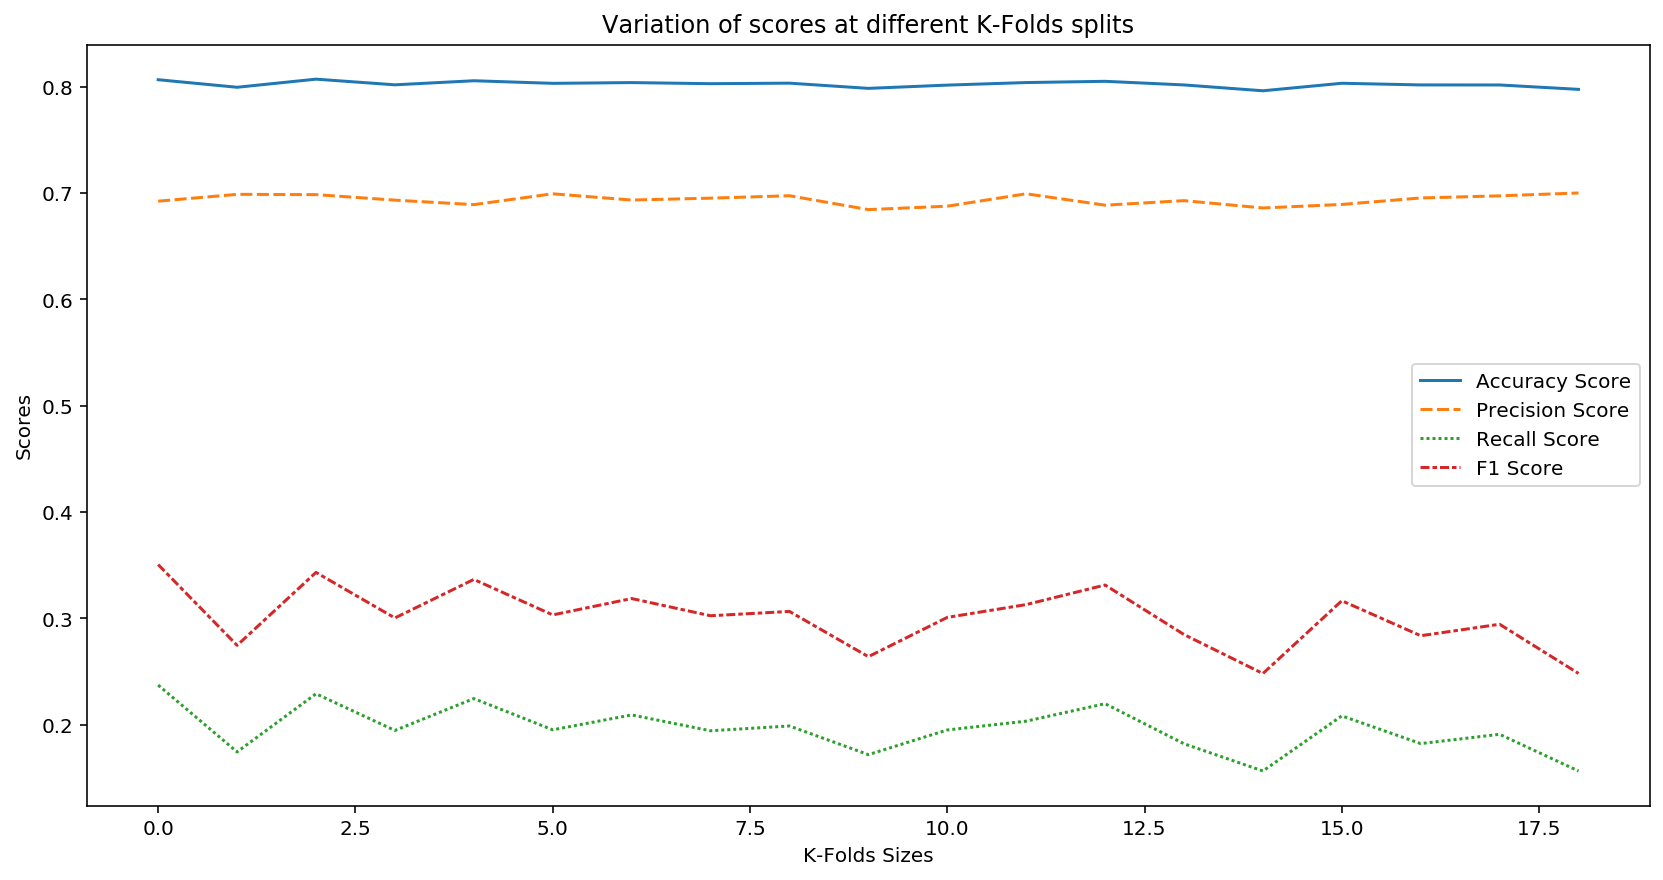

In [6]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=cv_scores_summary.filter(cv_scores_summary.columns[1:]))
# plt.xscale(5)
plt.title("Variation of scores at different K-Folds splits")
plt.xlabel("K-Folds Sizes")
plt.ylabel("Scores")

### Conclusions


From our observations, it seems a variation in kfolds has slit effects on improving the metrics of our model on this data sets. Most probably because it was unable to converge. To improve, we could consider increase the number of iterations and use some post-processing to save the model when our performance scores reach a maximum and don't decrease after a x-terations.

Under the current results, our best model will be at 2 k-folds. Indeed, the variance of our accuracy_score and and precision_score is slightlt above 0.1, whereas recall and f1 differ by more 0.1.